<a href="https://colab.research.google.com/github/MontiMic/Tesi/blob/main/Tesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from random import randint
from ipywidgets import interact, interact_manual
from matplotlib import pyplot as plt

La variabile che segue regola il numero di volte che viene ripetuto l'esperimento. Ad un più alto numero di ripetizioni aumento la precisione dei risultati (a discapito del tempo di esecuzione).
Per buoni risultati in un tempo di esecuzione di pochi secodi è suggerito lasciare la variabile al valore di default (100 000). Se si desiderano risultati più accurati è possibile aumentare il numero di prove ma si sconsiglia di superare il milione (con cui alcuni degli esperimenti più complessi impiegano già più di un minuto per eseguire).
Buono studio.

In [3]:
precisione = 100_000

In [ ]:
@interact(blue=(0, 100), red=(0, 100), estrazione=())
def geometrica(blue = 1, red = 1):
  tot_balls= blue + red
  urna = np.zeros((tot_balls,1), dtype=np.bool)
  while(red>0):
    tmp = np.random.randint(0, tot_balls)
    if(urna[tmp] == False):
      urna[tmp] = True
      red = red - 1


interactive(children=(IntSlider(value=1, description='blue'), IntSlider(value=1, description='red'), Output())…

In [ ]:
@interact(palline=(1, 50))
def prova(palline=20):
  palle = np.zeros((palline, 1), dtype=np.bool)
  palle[np.random.randint(0, palline)] = True
  results = []
  count = 0
  while(len(results) == 0):
    extr = np.random.randint(0, (palline-count))
    if(palle[extr]):
      results.append(count)
      print(results)
    else:
      palle = np.delete(palle,extr)
      count = count + 1

interactive(children=(IntSlider(value=20, description='palline', max=50, min=1), Output()), _dom_classes=('wid…

In [ ]:
@interact(palline=(1, 50))
def prova(palline=20):
  palle = np.zeros((palline, 1), dtype=np.bool)
  palle[np.random.randint(0, palline)] = True
  results = []
  count=0
  while(len(results) < 10_000):
    done = len(results)
    tmp = palle
    while(len(results) == done):
      extr = np.random.randint(0, (palline-count))
      if(tmp[extr]):
        results.append(count)
        count=0
      else:
        tmp = np.delete(tmp,extr)
        count = count + 1
  elem_count = []
  for i in range(1, palline + 1):
    elem_count.append(results.count(i - 1))
  plt.bar(range(1, palline + 1), elem_count)

interactive(children=(IntSlider(value=20, description='palline', max=50, min=1), Output()), _dom_classes=('wid…

In [ ]:
@interact(palline=(5, 50), rosse=(1, 5))
def prova(palline=20, rosse=1):
  palle = np.zeros((palline, 1), dtype=np.bool)
  while(rosse > 0):
    rnd = np.random.randint(0, (palline))
    if (not palle[rnd]):
      palle[rnd] = True
      rosse = rosse - 1
  results = []
  count=0
  while(len(results) < 1_000_000):
    done = len(results)
    tmp = palle
    while(len(results) == done):
      extr = np.random.randint(0, (palline-count))
      if(tmp[extr]):
        results.append(count)
        count=0
      else:
        tmp = np.delete(tmp,extr)
        count = count + 1
  elem_count = []
  for i in range(1, palline + 1):
    elem_count.append(results.count(i - 1))
  plt.bar(range(1, palline + 1), elem_count)

interactive(children=(IntSlider(value=20, description='palline', max=50, min=5), IntSlider(value=1, descriptio…

Prepararione dell'urna

In [ ]:
@interact(palline=(5, 50), rosse=(1, 5))
def prova(palline=20, rosse=1):
  palle = np.zeros((palline, 1), dtype=np.bool)
  while(rosse > 0):
    rnd = np.random.randint(0, (palline))
    if (not palle[rnd]):
      palle[rnd] = True
      rosse = rosse - 1

interactive(children=(IntSlider(value=20, description='palline', max=50, min=5), IntSlider(value=1, descriptio…

In [ ]:
def mk_urna(biglie_b, biglie_r):
  n_biglie = biglie_b + biglie_r
  urna = np.zeros((n_biglie, 1), dtype=np.bool)
  while(biglie_r > 0):
    rnd = np.random.randint(0, (n_biglie))
    if (not urna[rnd]):
      urna[rnd] = True
      biglie_r = biglie_r - 1
  return urna

In [ ]:
@interact_manual(palline=(5, 50), rosse=(1, 5))
def prova(palline=20, rosse=1):
  palle = mk_urna(palline - rosse, rosse)
  results = []
  count=0
  while(len(results) < 1_000_000):
    done = len(results)
    tmp = palle
    while(len(results) == done):
      extr = np.random.randint(0, (palline-count))
      if(tmp[extr]):
        results.append(count)
        count=0
      else:
        tmp = np.delete(tmp,extr)
        count = count + 1
  elem_count = []
  for i in range(1, palline + 1):
    elem_count.append(results.count(i - 1))
  plt.bar(range(1, palline + 1), elem_count)
  plt.title("Numero di primi successi per ogni estrazione")
  plt.show()

interactive(children=(IntSlider(value=20, description='palline', max=50, min=5), IntSlider(value=1, descriptio…

Estrazioni senza rimpiazzo

In [ ]:
def estr_senza_rimpiazzo(n_risultati, ):
  count=0
  done = len(results)
  while(len(results) == done):
        extr = np.random.randint(0, (palline-count))
        if(tmp[extr]):
          results.append(count)
          count=0
        else:
          tmp = np.delete(tmp,extr)
          count = count + 1

Graficazione dei risultati

In [ ]:
elem_count = []
  for i in range(1, palline + 1):
    elem_count.append(results.count(i - 1))
  plt.bar(range(1, palline + 1), elem_count)

IndentationError: ignored

Test sulla roulette

In [ ]:
@interact_manual(giocate=(1, 10), puntata=(5, 100, 5))
def roulette(giocate = 3, puntata = 10):
  portafogli = giocate * puntata * 1_000_000
  ruota = np.zeros((37, 1), dtype=np.bool)
  ruota[1::2] = True
  for i in range(1_000_000):
    tentativi = giocate
    while(tentativi > 0):
      tentativi = tentativi - 1
      portafogli = portafogli - puntata
      if(ruota[np.random.randint(0, (37))]):
        portafogli = portafogli + (puntata * 2)
  portafogli = portafogli / 1_000_000
  return portafogli  

interactive(children=(IntSlider(value=3, description='giocate', max=10, min=1), IntSlider(value=10, descriptio…

In [ ]:
@interact_manual(vincita=(0, 30))
def roulette(vincita=0):
  giocate = 3
  puntata = 10
  ruota = np.zeros((37, 1), dtype=np.bool)
  ruota[1::2] = True
  count = 0
  for i in range(1_000_000):
    portafogli = giocate * puntata
    tentativi = giocate
    while(tentativi > 0):
      tentativi = tentativi - 1
      portafogli = portafogli - puntata
      if(ruota[np.random.randint(0, (37))]):
        portafogli = portafogli + (puntata * 2)
    if((portafogli - 30) >= vincita):
      count = count + 1
  return count / 10_000

interactive(children=(IntSlider(value=0, description='vincita', max=30), Button(description='Run Interact', st…

In [ ]:
@interact_manual(giocate=(1, 10), puntata=(5, 100, 5))
def roulette(giocate = 3, puntata = 10):
  ruota = np.zeros((37, 1), dtype=np.bool)
  ruota[1::2] = True
  results = []
  for i in range(1_000_000):
    portafogli = giocate * puntata
    tentativi = giocate
    while(tentativi > 0):
      tentativi = tentativi - 1
      portafogli = portafogli - puntata
      if(ruota[np.random.randint(0, (37))]):
        portafogli = portafogli + (puntata * 2)
    results.append(portafogli)
  elem_count = []
  valori = []
  for i in range(giocate + 1):
    elem_count.append(results.count(puntata*2*i))
    valori.append(str(puntata*2*i))
  plt.bar(valori, elem_count)

interactive(children=(IntSlider(value=3, description='giocate', max=10, min=1), IntSlider(value=10, descriptio…

Dadi

Lanciamo un dado 2 volte: qual è la probabilità di ottenere almeno un 6?

La teoria ci dice che detta probabilità può essere vista come la probabilità di ottenere un 6 al primo lancio, più la probabilità di ottenerlo al secondo lancio, meno quella di ottenerlo ad entrambi i lanci.
Da questo calcoliamo che il valore atteso è di:

$\frac{1}{6} + \frac{1}{6} - \frac{1}{36} = \frac{11}{36} = 0.355$

In [ ]:
def trow():
  return np.random.randint(1, 7)

In [ ]:
@interact_manual(numero=(1, 6))
def roll_number(numero=6):
  count = 0
  for i in range(precisione):
    a, b = trow(), trow()
    if a == numero or b == numero:
      count = count + 1
  normalized = []
  normalized.append(round(((count / precisione) * 100), 2))
  normalized.append(round(100-normalized[0], 2))
  valori = []
  for i in range(len(normalized)):
    valori.append(str(normalized[i]) + "%")
  plt.pie(normalized, labels=valori)
  plt.legend(['Successi', 'Insuccessi'], loc="lower right")

interactive(children=(IntSlider(value=6, description='numero', max=6, min=1), Button(description='Run Interact…

In [ ]:
def even_dices():
  results = []
  for i in range(100_000):
    a, b = trow(), trow()
    results.append(2-((a % 2)+(b % 2)))
  valori = []
  elem_count = []
  for i in range(3):
    elem_count.append(results.count(i))
    valori.append(str(i))
  normalized = []
  for i in range(len(elem_count)):
    normalized.append(elem_count[i]/len(results))
  a = plt.figure(1)
  plt.bar(valori, elem_count)
  a.show()
  b = plt.figure(2)
  plt.pie(normalized, labels=valori)
  b.show()

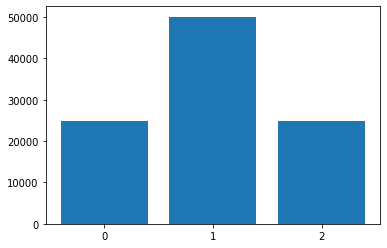

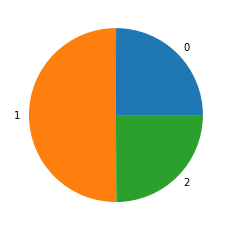

In [ ]:
even_dices()

In [ ]:
@interact_manual(malati=(1, 10))
def poisson(malati = 5):
  bambini = 10_000
  malattia = 2_000
  total = 0
  for i in range(1000):
    count = 0
    for i in range(bambini):
      if np.random.randint(malattia) == 1:
        count = count + 1
    if count > 5:
      total = total + 1
    count = 0
  return round(total / 1000, 3)

In [ ]:
def cont_unif(decimali):
  factor = 10 * decimali
  results = []
  for i in range(precisione):
    results.append(math.trunc(random.uniform(0, 10) * max(1, factor)) / max(1, factor))
  count_res = []
  labels = []
  test = list(set(results))
  for i in test:
    count_res.append(round(((results.count(i) / len(results)) * 100), 2))
    labels.append(str(i))
  plt.bar(labels, count_res)    

In [ ]:
@interact_manual(tempo=(0, 20))
def dcu_plot(tempo = 10):
  points = 1200
  results = []
  for i in range(precisione):
    results.append(random.uniform(0, tempo))
  
  x = np.linspace(-1, tempo+1, points)

  coord = []
  for i in range(points):
    count = 0
    for item in results:
      if (item > -1 + (((tempo+2)/points)*i) and item <= -1 + (((tempo+2)/points)*(i+1))):
        count = count + 1
    coord.append((count / precisione) * 100)
  
  a = plt.figure(1)
  ax = plt.axes()
  ax.plot(x, coord)
  ax.set_title("Densità")
  a.show()

In [ ]:
@interact_manual(tempo=(1, 20))
def cont_unif(tempo = 10):
  results = []
  for i in range(precisione):
    results.append(random.uniform(0, tempo))
  sns.displot(results, color="g")

In [ ]:
precisione = 100_000

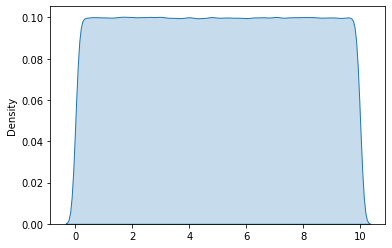

In [ ]:
cont_unif()

In [ ]:
def cont_unif():
  results = []
  for i in range(precisione):
    results.append(random.uniform(0, 10))
  sns.kdeplot(results,shade=True) 

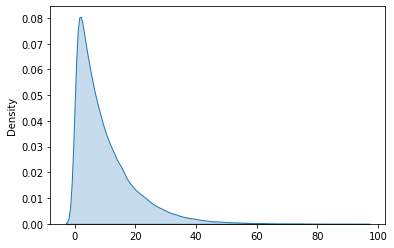

In [ ]:
def esp():
  results = []
  for i in range(precisione):
    results.append(-10*math.log(random.uniform(0, 1)))
  sns.kdeplot(results,shade=True)
esp()

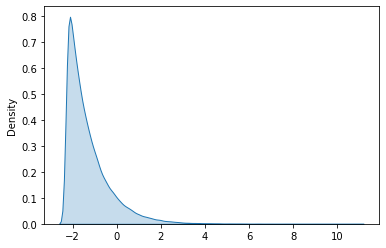

In [ ]:
def esp():
  results = []
  for i in range(precisione):
    results.append(-math.log(random.uniform(0, 10)))
  sns.kdeplot(results,shade=True)
esp()

In [ ]:
@interact_manual(t=(1, 50))
def esp(t=1):
  results = []
  for i in range(precisione):
    results.append(-math.log(random.uniform(0, 1)))
  count = 0
  for item in results:
    if item <= t:
      count = count + 1
  return (count / precisione) * 100

interactive(children=(IntSlider(value=1, description='t', max=50, min=1), Button(description='Run Interact', s…

In [ ]:
@interact_manual(tempo=(0, 20))
def dcu_plot(tempo = 10):
  points = 1200
  results = []
  for i in range(precisione):
    results.append(-math.log(random.uniform(0, 1)))
  
  x = np.linspace(-1, 15, points)

  coord = []
  for i in range(points):
    count = 0
    for item in results:
      if (item > -1 + (((16)/points)*i) and item <= -1 + (((16)/points)*(i+1))):
        count = count + 1
    coord.append((count / precisione) * (points / (16)) * 10)
  
  a = plt.figure(1)
  ax = plt.axes()
  ax.plot(x, coord)
  ax.set_title("Densità")
  a.show()

interactive(children=(IntSlider(value=10, description='tempo', max=20), Button(description='Run Interact', sty…

In [3]:
precisione = 1_000_00

In [2]:
import random
import math
import numpy as np
import pandas as pd
from random import randint
from ipywidgets import interact, interact_manual
from matplotlib import pyplot as plt
import seaborn as sns

La funzione kdeplot della libreria seaborn cerca di approssimare un modello partendo da un set di dati e passandole il nostro insieme di "orari di arrivo dell'autobus", questo è il modello che immagina:

In [ ]:
@interact_manual(tempo=(1, 20))
def cont_unif(tempo = 10):
  results = []
  for i in range(precisione):
    results.append(random.uniform(0, tempo))
  sns.kdeplot(results,shade=True) 

In [ ]:
@interact_manual(a=(0, 5), b=(5, 20))
def dcu_plot(a = 0, b = 10):
  results = []
  for i in range(precisione):
    results.append(random.uniform(a, b))
  
  x = np.linspace(a - 1, b + 1, 1000)

  p1 = plt.figure(1)
  ax = plt.axes()
  ax.plot(x, densita(x, a, b))
  ax.set_title("Densità")
  p1.show()
  p2 = plt.figure(2)
  sns.displot(results, kind="ecdf").set(title="Partizione")
  p2.show() 

In [14]:
uniforme = []
tempo = 10
for i in range(precisione):
  uniforme.append(random.uniform(0, tempo))

In [25]:
@interact_manual(a=(0, 10), b=(0, 10))
def dcu_plot(a = 4, b = 6):
  if a > b:
    return ("Intervallo non valido")
  
  points = (tempo + 2) * 10
  
  x = np.linspace(-1, tempo+1, points)
  x1 = np.linspace(a, b, (b - a) * 10)

  coord = []
  for i in range(points):
    count = 0
    for item in uniforme:
      if (item > -1 + (((tempo+2)/points)*i) and item <= -1 + (((tempo+2)/points)*(i+1))):
        count = count + 1
    coord.append((count / precisione) * (points / (tempo + 2)))

  coord2 = []
  for i in range((b - a) * 10):
    count = 0
    for item in uniforme:
      if item >= a + (((b - a) / ((b - a) * 10)) * i) and item <= a + (((b - a) / ((b - a) * 10)) * (i+1)):
        count = count + 1
    coord2.append((count / precisione) * (((b - a) * 10) / (b - a)))

  plt.plot(x, coord)
  #plt.tight_layout()
  plt.fill_betweenx(coord2, x1, alpha=0.30)

interactive(children=(IntSlider(value=4, description='a', max=10), IntSlider(value=6, description='b', max=10)…

In [11]:
@interact_manual(a=(0, 10), b=(0, 10))
def dcu_plot(a = 4, b = 6):
  if a > b:
    return ("Intervallo non valido")

  unif1 = [x for x in uniforme if x >= a and x <= b]

  
  points = ((tempo + 2) * 10)
  points2 = ((b - a) * 10)

  x = np.linspace(-1, tempo+1, points)
  x1 = np.linspace(a, b, points2)

  coord2 = []
  for i in range(points):
    count = 0
    for item in unif1:
      if (item > -1 + (((tempo+2)/points)*i) and item <= -1 + (((tempo+2)/points)*(i+1))):
        count = count + 1
    coord2.append((count / precisione) * (points / (tempo + 2)))

  #plt.tight_layout()
  plt.fill_betweenx(coord2, x, alpha=0.30)

interactive(children=(IntSlider(value=4, description='a', max=10), IntSlider(value=6, description='b', max=10)…

Questa va

In [15]:
@interact_manual(a=(0, 10), b=(0, 10))
def dcu_plot(a = 4, b = 6):
  if a > b:
    return ("Intervallo non valido")

  unif1 = [x for x in uniforme if x >= a and x <= b]
  
  points = ((tempo + 2) * 10) + 1
  #points2 = ((b - a) * 10) + 1

  x = np.linspace(-1, tempo+1, points)
  #x1 = np.linspace(a, b, points2)

  coord = []
  for i in range(points):
    count = 0
    for item in uniforme:
      if (item > -1 + (((tempo+2)/points)*i) and item <= -1 + (((tempo+2)/points)*(i+1))):
        count = count + 1
    coord.append((count / precisione) * (points / (tempo + 2)))

  coord2 = []
  for i in range(points):
    count = 0
    for item in unif1:
      if (item > -1 + (((tempo+2)/points)*i) and item <= -1 + (((tempo+2)/points)*(i+1))):
        count = count + 1
    coord2.append((count / precisione) * (points / (tempo + 2)))

  plt.plot(x, coord)
  plt.fill_betweenx(coord2, x, alpha=0.30)

interactive(children=(IntSlider(value=4, description='a', max=10), IntSlider(value=6, description='b', max=10)…

In [26]:
@interact_manual(a=(0, 10), b=(0, 10))
def dcu_plot(a = 4, b = 6):
  if a > b:
    return ("Intervallo non valido")

  unif1 = [x for x in uniforme if x >= a and x <= b] 
  points = ((tempo + 2) * 10) + 1
  x = np.linspace(-1, tempo+1, points)

  coord = []
  for i in range(points):
    count = 0
    for item in uniforme:
      if (item > -1 + (((tempo+2)/points)*i) and item <= -1 + (((tempo+2)/points)*(i+1))):
        count = count + 1
    coord.append((count / precisione) * (points / (tempo + 2)))
  
  coord2 = []
  for i in range(points):
    count = 0
    for item in unif1:
      if (item > -1 + (((tempo+2)/points)*i) and item <= -1 + (((tempo+2)/points)*(i+1))):
        count = count + 1
    coord2.append((count / precisione) * (points / (tempo + 2)))
    coord2[(a*10)+10] = coord2[(a*10)+10] + coord2[(b*10)+10]
    coord2.remove(coord2[(b*10)+10])

  first = (a*10)+10
  last = (b*10)+10
  x1 = coord[first:last]
  x1.append(a)
  x1.append(b)
  y1 = [i for i in x if a <= i <= b]
  y1.append(0)
  y1.append(0)

  plt.plot(x, coord)
  plt.fill(x1, y1, alpha=0.30)

interactive(children=(IntSlider(value=4, description='a', max=10), IntSlider(value=6, description='b', max=10)…

In [12]:
@interact_manual(a=(0, 10), b=(0, 10))
def dcu_plot(a = 4, b = 6):
  if a > b:
    return ("Intervallo non valido")
  
  points = ((tempo + 2) * 10) + 1
  points2 = ((b - a) * 10) + 1

  x = np.linspace(-1, tempo+1, points)
  x1 = np.linspace(a, b, points2)

  coord = []
  for i in range(points):
    count = 0
    for item in uniforme:
      if (item > -1 + (((tempo+2)/points)*i) and item <= -1 + (((tempo+2)/points)*(i+1))):
        count = count + 1
    coord.append((count / precisione) * (points / (tempo + 2)))

  coord2 = []
  for i in range(points):
    count = 0
    for item in uniforme:
      if (item >= a + (((tempo+2)/points)*i) and item <= a + (((tempo+2)/points)*(i+1))):
        count = count + 1
    coord2.append((count / precisione) * (points / (tempo + 2)))

  plt.plot(x, coord)
  #plt.tight_layout()
  plt.fill_betweenx(coord2, x1, alpha=0.30)

interactive(children=(IntSlider(value=4, description='a', max=10), IntSlider(value=6, description='b', max=10)…

In [11]:
@interact_manual(t1=(0, 100), t2=(0, 100))
def es82(t1=3, t2=10):
  if t1 > t2:
    return ("Intervallo non valido")
  
  points = 46
  tempo = 4.5
  a = -0.5

  x = np.linspace(a, tempo - a, points)
  
  exp1 = []
  for i in range(precisione):
    exp1.append(-math.log(random.uniform(0, 1)))

  exp2 = [x for x in exp1 if x >= t1/24 and x <= t2/24]

  coord = []
  for i in range(points):
    count = 0
    for item in exp1:
      if (item > a + (((tempo)/points)*i) and item <= a + (((tempo)/points)*(i+1))):
        count = count + 1
    coord.append((count / precisione) * (points / (tempo)))

  coord2 = []
  for i in range(points):
    count = 0
    for item in exp2:
      if (item > a + (((tempo)/points)*i) and item <= a + (((tempo)/points)*(i+1))):
        count = count + 1
    coord2.append((count / precisione) * (points / (tempo)))
  
  y = np.arange(0.0, 0.5, 0.01)
  plt.plot(x, coord)
  plt.fill_betweenx(y, t1/24, t2/24, alpha=0.30)

interactive(children=(IntSlider(value=3, description='t1'), IntSlider(value=10, description='t2'), Button(desc…

In [34]:
@interact_manual(t1=(0, 100), t2=(0, 100))
def es82(t1=3, t2=10):
  if t1 > t2:
    return ("Intervallo non valido")
  
  points = 46
  tempo = 4.5
  a = -0.5

  x = np.linspace(a, tempo - a, points)
  
  exp1 = []
  for i in range(precisione):
    exp1.append(-math.log(random.uniform(0, 1)))

  exp2 = [x for x in exp1 if x >= t1/24 and x <= t2/24]

  coord = []
  for i in range(points):
    count = 0
    for item in exp1:
      if (item > a + (((tempo)/points)*i) and item <= a + (((tempo)/points)*(i+1))):
        count = count + 1
    coord.append((count / precisione) * (points / (tempo)))

  coord2 = []
  for i in range(points):
    count = 0
    for item in exp2:
      if (item > a + (((tempo)/points)*i) and item <= a + (((tempo)/points)*(i+1))):
        count = count + 1
    coord2.append((count / precisione) * (points / (tempo)))

  y1 = t1/24
  y2 = 1_000_000 - (999_997/3)*x
  y3 = np.minimum(coord2, y2)
  y3 = y3[y3 >= 0]
  for i in range(len(x) - len(y3)):
    y3 = np.append(y3, 0)
  
  plt.plot(x, coord)
  plt.fill_betweenx(x, y1, y3, alpha=0.30)

interactive(children=(IntSlider(value=3, description='t1'), IntSlider(value=10, description='t2'), Button(desc…